# Manipulate Time Data

![](https://media.giphy.com/media/d3yxg15kJppJilnW/giphy.gif)

**This morning** we will practice loading in and manipulating time series data.

In the cell below we import a dataset that counts the number of monthly [sunspots](https://en.wikipedia.org/wiki/Sunspot#:~:text=Sunspots%20are%20temporary%20phenomena%20on,pairs%20of%20opposite%20magnetic%20polarity.) from 1749-2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from test_scripts.test_class import Test
test = Test()

df = pd.read_csv('data/Sunspots.csv')
df = df.iloc[:,1:]
df.columns  = ['date', 'sunspots']
df.head()

,date,sunspots
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


Let's check the datatype for the `date` column.

In [2]:
df.date.dtype

dtype('O')

Currently, the `date` column is an `Object` datatype which is the datatype pandas used for strings.

<u><b>In the cell below:</b></u>
1. Change the datatype of the `date` column to `datetime`.
2. Set the `date` column as the index for the `df` variable.

In [3]:

df['date'] = pd.to_datetime(df.date)

df.set_index('date', inplace = True)

df.head()

,sunspots
date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


Run the cell below to test your results!

In [4]:
test.run_test(df, 'sunspot_date_index')

✅ **Hey, you did it.  Good job.**

Ok, let's take a look at the sunspots data.

<u><b>In the cell below</b></u>, plot a simple line plot of the sunspots column, using the datetime index as the x-axis

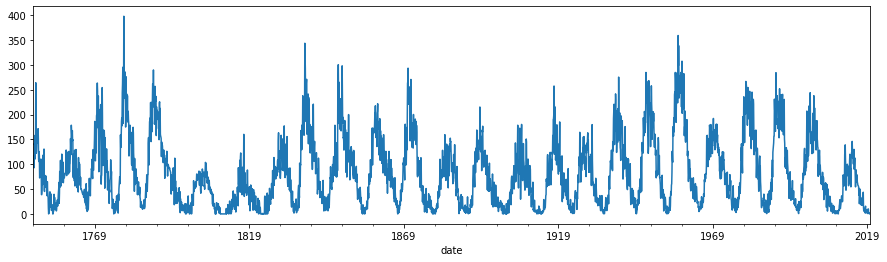

In [5]:
df.sunspots.plot(figsize=(15,4));

Please describe the data. Do you see any trends or Seasonality?

In [1]:
print('''
There is a repeating pattern in these data that 
repeats about every 10 years, and serves as evidence of seasonality. 
There is some evidence of a repeating cycle every 100 years as well,
but this pattern is much more subtle than the 10 year seasonality.''')


There is a repeating pattern in these data that 
repeats about every 10 years, and serves as evidence of seasonality. 
There is some evidence of a repeating cycle every 100 years as well,
but this pattern is much more subtle than the 10 year seasonality.


**Let's find the rolling mean with a window of 3 time steps**

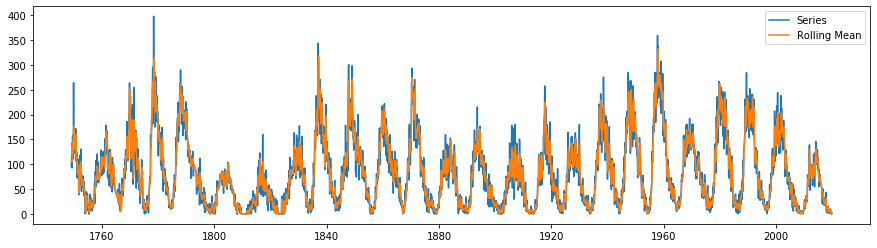

In [7]:
# Find the rolling mean with the .rolling method
rolling_mean = df.sunspots.rolling(window=3).mean()

# Plot the rolling mean and the original data together
plt.figure(figsize=(15,4))
plt.plot(df.index, df.sunspots, label='Series')
plt.plot(df.index, rolling_mean, label='Rolling Mean')
plt.legend();

**Ok Ok,** Let's define a function called `rolling_mean_diff` that, when given a series and a window size:
1. Will find the rolling mean with the provided window size
2. Subtract the rolling mean from the original series. 
3. Return the differenced time series

In [8]:
def rolling_mean_diff(series, window=3):
    rolling_mean = series.rolling(window=3).mean()
    return series - rolling_mean

Now,  let's use our `rolling_mean_diff` function to see if subtracting the rolling mean results in a stationary time series.

In [9]:
sunspots_rolling_mean_diff = rolling_mean_diff(df.sunspots)

Run the cell below to test your results!

In [10]:
test.run_test(sunspots_rolling_mean_diff, 'sunspots_rolling_mean_diff')

✅ **Hey, you did it.  Good job.**

Now, let's plot the newly differenced time series.

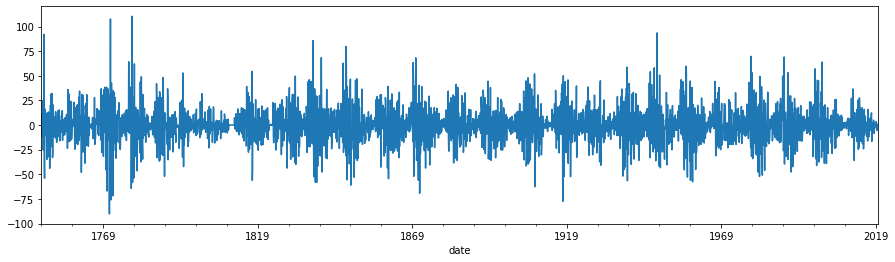

In [11]:
sunspots_rolling_mean_diff.plot(figsize=(15,4));

Please interpret the graph above. Is it stationary?

In [12]:
print('''
After differencing using a rolling mean, with a window of 3 time steps,
the time series is much more stationary than in its original form.
There is still a slight seasonality within these data that could
perhaps be modeled further.''')


After differencing using a rolling mean, with a window of 3 time steps,
the time series is much more stationary than in its original form.
There is still a slight seasonality within these data that could
perhaps be modeled further.


## Resample

Lastly, let's resample our data.

We will down sample our data to a `calendar year end` [yearly frequency](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).


In [13]:
yearly = df.sunspots.resample('A').mean()

Run the cell below to test your results!

In [14]:
test.run_test(yearly, 'yearly_resample')

✅ **Hey, you did it.  Good job.**

Let's take a look at our yearly time series.

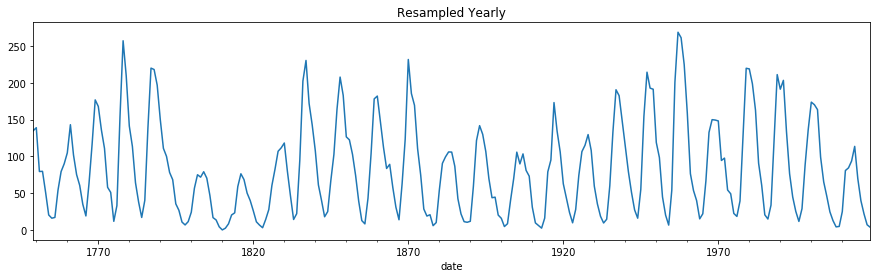

In [15]:
yearly.plot(figsize=(15,4), title='Resampled Yearly');